In [60]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re
import sys
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_similarity_score
cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
stop = set(stopwords.words("english"))
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls",obama-white-house.csv"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [90]:
data = pd.read_csv("input/obama-white-house.csv",nrows=1000)
data.head(100)

,number,name,image,previous_office,presidency_url,party_affiliation,start_date,end_date,document_type_name,document_types_slug,title,url,content,document_date
0,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Statements and Releases,/briefing-room/statements-and-releases,FACT SHEET: United States – Argentina Relatio...,https://obamawhitehouse.archives.gov/the-press...,"President Obama, accompanied by First Lady Mic...",2016-03-23 00:00:00
1,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Statements and Releases,/briefing-room/statements-and-releases,FACT SHEET: U.S.-China Economic Relations,https://obamawhitehouse.archives.gov/the-press...,The United States and China recognize their sh...,2015-09-25 00:00:00
2,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Presidential Memoranda,/briefing-room/presidential-actions/presidenti...,Presidential Memorandum -- Establishing Polici...,https://obamawhitehouse.archives.gov/the-press...,MEMORANDUM FOR THE HEADS OF EXECUTIVE DEPARTME...,2012-04-18 00:00:00
3,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Your Weekly Address,/briefing-room/weekly-address,Weekly Address: Reducing Carbon Pollution in O...,https://obamawhitehouse.archives.gov/the-press...,Remarks of President Barack Obama Weekly Addre...,2014-05-31 00:00:00
4,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Presidential Memoranda,/briefing-room/presidential-actions/presidenti...,Presidential Memorandum -- Accelerating Techno...,https://obamawhitehouse.archives.gov/the-press...,MEMORANDUM FOR THE HEADS OF EXECUTIVE DEPARTME...,2011-10-28 00:00:00
5,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Your Weekly Address,/briefing-room/weekly-address,Weekly Address: Paying Tribute to our Fallen H...,https://obamawhitehouse.archives.gov/the-press...,Remarks of President Barack Obama Weekly Add...,2014-05-24 00:00:00
6,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Your Weekly Address,/briefing-room/weekly-address,Weekly Address: Working When Congress Won’t Act,https://obamawhitehouse.archives.gov/the-press...,Remarks of President Barack Obama Weekly Addre...,2014-05-17 00:00:00
7,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Your Weekly Address,/briefing-room/weekly-address,Weekly Address: The First Lady Marks Mother’s ...,https://obamawhitehouse.archives.gov/the-press...,Remarks of First Lady Michelle Obama Weekly ...,2014-05-10 00:00:00
8,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Statements and Releases,/briefing-room/statements-and-releases,FACT SHEET ON SYRIA,https://obamawhitehouse.archives.gov/the-press...,The United States has taken a series of steps ...,2011-08-18 00:00:00
9,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00

In [62]:
data.shape

(1000, 14)

In [63]:
stopwords = set(STOPWORDS)
wordcloud_title = WordCloud(background_color = 'white',\
                           stopwords = stopwords, max_words = 200,\
                           max_font_size = 40,\
                           random_state = 42).generate(\
                                                      str(data['title']))

(-0.5, 399.5, 199.5, -0.5)

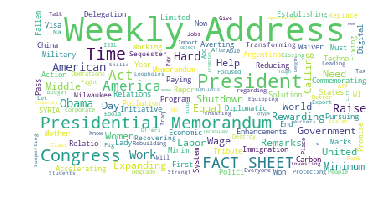

In [64]:
plt.imshow(wordcloud_title)
plt.axis('off')


In [65]:
print(wordcloud_title.words_)

{'Weekly Address': 1.0, 'President': 0.17391304347826086, 'Congress': 0.13043478260869565, 'Time': 0.13043478260869565, 'Presidential Memorandum': 0.13043478260869565, 'FACT SHEET': 0.10869565217391304, 'Act': 0.08695652173913043, 'America': 0.08695652173913043, 'American': 0.06521739130434782, 'Hard': 0.06521739130434782, 'Obama': 0.06521739130434782, 'Work': 0.06521739130434782, 'Raise': 0.06521739130434782, 'United': 0.043478260869565216, 'Government': 0.043478260869565216, 'Shutdown': 0.043478260869565216, 'Calling': 0.043478260869565216, 'Labor': 0.043478260869565216, 'Day': 0.043478260869565216, 'Expanding': 0.043478260869565216, 'Remarks': 0.043478260869565216, 'Help': 0.043478260869565216, 'Women': 0.043478260869565216, 'Need': 0.043478260869565216, 'Middle': 0.043478260869565216, 'World': 0.043478260869565216, 'Equal': 0.043478260869565216, 'Minimum': 0.043478260869565216, 'Wage': 0.043478260869565216, 'Rewarding': 0.043478260869565216, 'States': 0.021739130434782608, 'Argenti

(-0.5, 399.5, 199.5, -0.5)

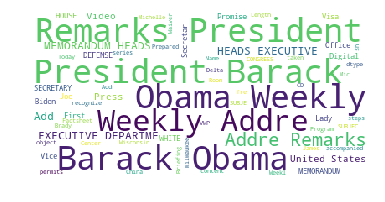

In [66]:
wordcloud_content = WordCloud(background_color='white',\
                             stopwords=stopwords,\
                             max_words = 200,\
                             max_font_size = 40,\
                             random_state = 42\
                             ).generate(str(data['content']))
plt.imshow(wordcloud_content)
plt.axis('off')


In [67]:
words = wordcloud_content.words_
words_top10 = list(words.keys())[1:11]

word_dates = []
content = data['content']
for word in words_top10:
    dates = []
    for i in range(content.size):
        string = content[i]
        if string.find(word) != -1:
            dates.append(data['document_date'][i])
    word_dates.append(dates)

### Data Cleaning

In [68]:
data['content']

0      President Obama, accompanied by First Lady Mic...
1      The United States and China recognize their sh...
2      MEMORANDUM FOR THE HEADS OF EXECUTIVE DEPARTME...
3      Remarks of President Barack Obama Weekly Addre...
4      MEMORANDUM FOR THE HEADS OF EXECUTIVE DEPARTME...
5      Remarks of President Barack Obama   Weekly Add...
6      Remarks of President Barack Obama Weekly Addre...
7      Remarks of First Lady Michelle Obama   Weekly ...
8      The United States has taken a series of steps ...
9      Remarks of President Barack Obama Weekly Addre...
10     Remarks of President Barack Obama Weekly Addre...
11     Remarks of President Barack Obama Weekly Addre...
12     Remarks of President Barack Obama Weekly Addre...
13     Remarks of President Barack Obama Weekly Addre...
14     Remarks of President Barack Obama Weekly Addre...
15     Remarks of President Barack Obama Weekly Addre...
16     Remarks of President Barack Obama Weekly Addre...
17     The Visa Waiver Program 

In [69]:
def cleaning(s):
    s = str(s)
    s = s.lower()
#     s = re.sub('\s\W',' ',s)
#     s = re.sub('\W,\s',' ',s)
#     s = re.sub(r'[^\W]',' ',s)
#     s = re.sub('\d+','',s)
#     s = re.sub('\s+',' ',s)
#     s = re.sub('[!@#$_]','',s)
#     s = s.replace('co','')
#     s = s.replace('https','')
#     s = s.replace(',','')
#     s = s.replace('[\W*',' ')
    return s

data['content'] = [cleaning(s) for s in data['content']]
data['title'] = [cleaning(s) for s in data['title']]


In [70]:
data['content']

0      president obama, accompanied by first lady mic...
1      the united states and china recognize their sh...
2      memorandum for the heads of executive departme...
3      remarks of president barack obama weekly addre...
4      memorandum for the heads of executive departme...
5      remarks of president barack obama   weekly add...
6      remarks of president barack obama weekly addre...
7      remarks of first lady michelle obama   weekly ...
8      the united states has taken a series of steps ...
9      remarks of president barack obama weekly addre...
10     remarks of president barack obama weekly addre...
11     remarks of president barack obama weekly addre...
12     remarks of president barack obama weekly addre...
13     remarks of president barack obama weekly addre...
14     remarks of president barack obama weekly addre...
15     remarks of president barack obama weekly addre...
16     remarks of president barack obama weekly addre...
17     the visa waiver program 

### Stopwords removal

In [71]:
#data['content'] = data.apply(lambda row: nltk.word_tokenize(row['content']),axis=1)
#data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']),axis=1)

#data['content'] = data['content'].apply(lambda x : [item for item in x if item not in stop])
#data['title'] = data['title'].apply(lambda x : [item for item in x if item not in stop])

### TF-IDF and Kmeans

In [72]:
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['content'].str.upper())
km = KMeans(n_clusters= 5, init ='k-means++', max_iter=200, n_init = 1)

k = km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print('cluster of words %d'%i)
    for ind in order_centroids[i,:10]:
        print(' %s'%terms[ind])
    print()

cluster of words 0
 jobs
 ve
 economy
 new
 american
 businesses
 people
 americans
 tax
 class

cluster of words 1
 memorandum
 secretary
 section
 united
 states
 act
 shall
 agencies
 federal
 authority

cluster of words 2
 ve
 people
 day
 americans
 just
 women
 country
 america
 ll
 everybody

cluster of words 3
 act
 section
 determination
 que
 assistance
 refugee
 united
 migration
 authority
 states

cluster of words 4
 emergency
 national
 declared
 notice
 continue
 order
 executive
 respect
 threat
 stating



In [73]:
data['content']

0      president obama, accompanied by first lady mic...
1      the united states and china recognize their sh...
2      memorandum for the heads of executive departme...
3      remarks of president barack obama weekly addre...
4      memorandum for the heads of executive departme...
5      remarks of president barack obama   weekly add...
6      remarks of president barack obama weekly addre...
7      remarks of first lady michelle obama   weekly ...
8      the united states has taken a series of steps ...
9      remarks of president barack obama weekly addre...
10     remarks of president barack obama weekly addre...
11     remarks of president barack obama weekly addre...
12     remarks of president barack obama weekly addre...
13     remarks of president barack obama weekly addre...
14     remarks of president barack obama weekly addre...
15     remarks of president barack obama weekly addre...
16     remarks of president barack obama weekly addre...
17     the visa waiver program 

### Building corpus from title and contents

In [74]:
def build_corpus(data):
    corpus = []
    for col in ['title','content']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
    return corpus
corpus = build_corpus(data)
corpus[0:2]

[['fact', 'sheet:', '', 'united', 'states', '–', 'argentina', 'relationship'],
 ['fact', 'sheet:', 'u.s.-china', 'economic', 'relations']]

### Words to vector

In [75]:
model = word2vec.Word2Vec(corpus, size = 100, window = 20, \
                         min_count = 400, workers = 4)

In [76]:
model.wv['states']

array([ 1.30130374,  0.02765598,  0.11453608,  0.66079897,  0.36957946,
        2.31661701, -0.33617392,  0.79601198, -1.31668818,  0.13694063,
       -0.64265096,  0.69068593,  0.82951111,  1.20165992, -1.00110495,
       -0.76299256,  0.00747486, -0.93236554,  0.20369098,  1.62863576,
       -1.54231799,  1.55194235,  0.30845869, -0.91383487, -0.83196467,
        0.05329602,  0.41224536,  0.92167664,  0.34077609, -2.60645604,
        1.22458017, -0.77973837, -1.32340884, -1.78338063, -1.5048877 ,
       -0.7423532 ,  0.33338282, -0.3095991 , -0.50362253,  0.15645382,
        1.35784101, -0.61239761, -0.39687374, -0.16179025, -0.21607338,
       -0.10628714, -0.41187763,  0.57199168,  0.72158617,  2.03697896,
        0.04000592,  2.06122851, -1.29246783, -1.29901266, -0.31106484,
       -0.75031388, -1.5912118 , -0.61200982, -0.05001472,  0.19410205,
        1.393507  , -1.99462438, -1.17166412, -2.13150263, -0.14401677,
        0.57257342, -0.33676705, -0.52475119,  0.59464067, -0.07

### Data Visualization

In [88]:
def tsne_plot(model):
    labels = []
    tokens = []
    
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity= 40, n_components=2, init='pca', n_iter = 2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x =[]
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize = (16,16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy = (x[i],y[i]),\
                    xytext = (5,2),\
                    textcoords = 'offset points',\
                    ha = 'right', va ='bottom')
    plt.show()

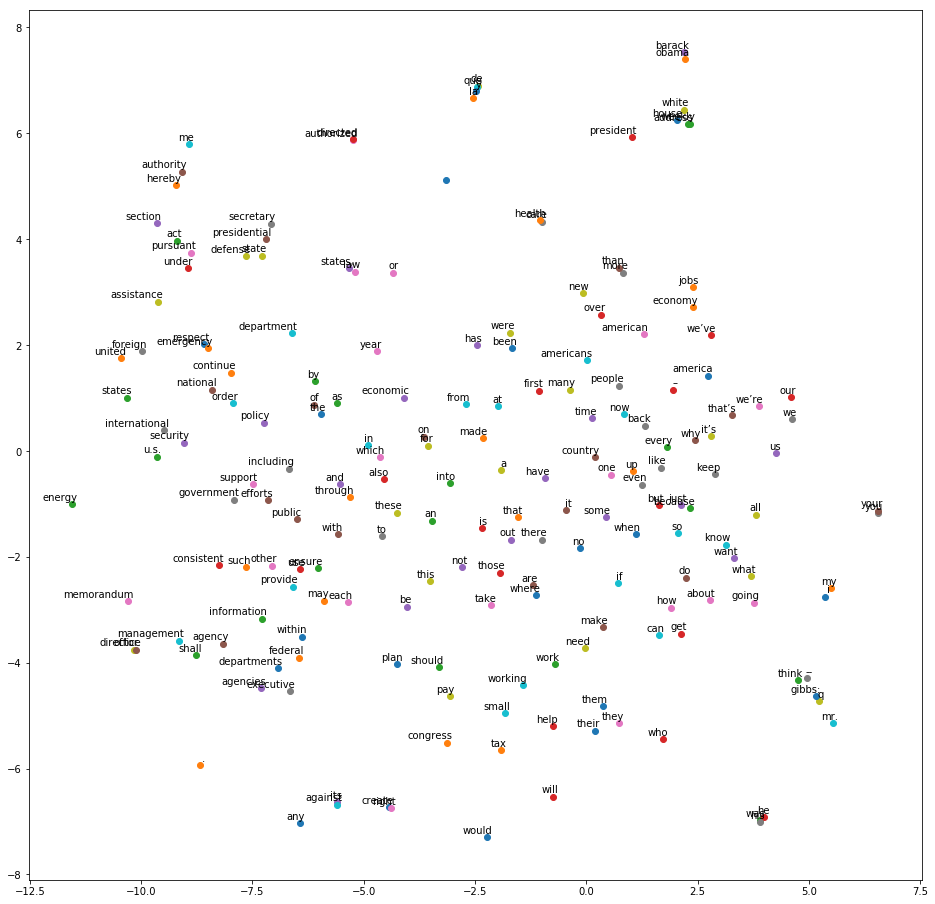

In [89]:
tsne_plot(model)